In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [6]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

In [7]:
lista_alumnos_df = pd.DataFrame(lista_alumnos, columns=["Nombre", "Edad", "Altura"])
lista_alumnos_df

,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90
5,Miguel N,27,1.80
6,Alejandro M,28,1.70
7,Cristina M,32,1.60
8,Francisco P,36,1.74
9,Jorge D,45,1.72


<Axes: xlabel='Edad', ylabel='Altura'>

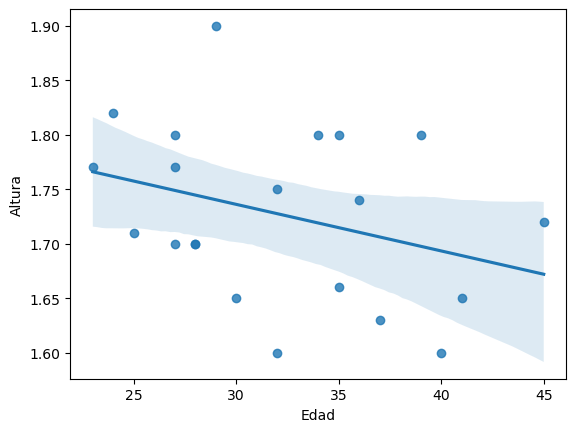

In [23]:
sns.regplot(x=lista_alumnos_df["Edad"], y=lista_alumnos_df["Altura"], data=lista_alumnos_df)

<Axes: xlabel='Edad', ylabel='Altura'>

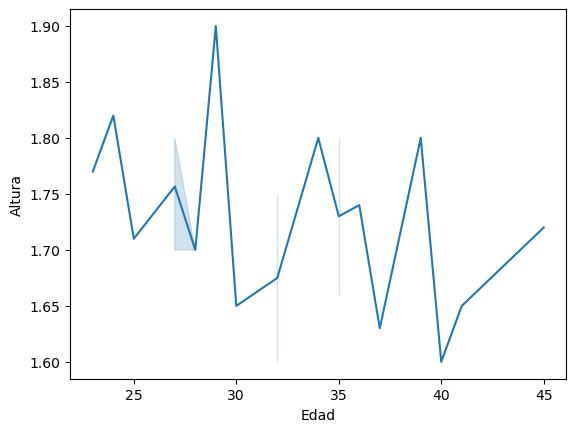

In [ ]:
sns.lineplot(x=lista_alumnos_df["Edad"], y=lista_alumnos_df["Altura"], data=lista_alumnos_df)

### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

No es un buen método pues de esta manera se generan rectas de punto a punto, de forma que cualquier punto nuevo a evaluar, de caer entre dos de entrenamiento, se predicirían sobre dichas rectas, lo cual es impreciso. Se ha de hacer una regresión para hacer una aproximación más realista.

### Entrena un modelo de regresión lineal

In [13]:
X = lista_alumnos_df.drop(['Nombre', 'Altura'], axis=1)
y = lista_alumnos_df['Altura']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression 
    
model = LinearRegression()
	
model.fit(X_train,y_train)

LinearRegression()

### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

test_predictions = model.predict(X_test)

MAE = mean_absolute_error(y_test, test_predictions)
MAPE = mean_absolute_percentage_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)
		
print(f"MAE: {MAE}")
print(f"MAPE: {MAPE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")

print(f"\nMedia de la altura de los alumnos: {lista_alumnos_df['Altura'].mean()}")

MAE: 0.08370001597359043
MAPE: 0.0504961596126872
MSE: 0.00853827315109365
RMSE: 0.09240277674990968

Media de la altura de los alumnos: 1.7271428571428573
